<a href="https://colab.research.google.com/github/Zahidlab/OCT-classifier/blob/main/OCT_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importing Utils

In [1]:
import requests
from pathlib import Path

# Download helper functions from Learn PyTorch repo
if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists, skipping download...")
else:
  print("Downloading helper_functions.py")
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)
from helper_functions import accuracy_fn

helper_functions.py already exists, skipping download...


C:\Users\HP\anaconda3\envs\zahid\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
import torch
from PIL import Image
import cv2
from skimage import io
import torchvision
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor
from torch import nn
from sklearn.datasets import make_circles, make_blobs
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from torch.utils.data import DataLoader
from torchsummary import summary
import numpy as np

In [3]:
import torch 
import os
print(torch.__version__)
device = "cuda" if torch.cuda.is_available() else "cpu"
device

1.13.1


'cuda'

## Data Download

In [17]:
train_path = r"C:\Users\HP\Documents\Zahid\OCT\DATASET\miniOCT\train"
test_path = r"C:\Users\HP\Documents\Zahid\OCT\DATASET\miniOCT\test"
IMG_SIZE = 224
IMG_CHNL = 1
CLASSES = os.listdir(train_path)
CLASSES

['CNV', 'DME', 'DRUSEN', 'NORMAL']

In [5]:
# Training
x_train_list = []
y_train_list = []
for folder in os.listdir(train_path):
    
    for img in os.listdir(os.path.join(train_path, folder)):
        img = cv2.imread(os.path.join(train_path,folder,img ),0)
        img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
        klass = CLASSES.index(folder)
        x_train_list.append(img)
        y_train_list.append(klass)
        

In [6]:
# Testing
x_test_list = []
y_test_list = []
for folder in os.listdir(test_path):
    
    if folder[0]==".":
        continue
    
    for img in os.listdir(os.path.join(test_path, folder)):
        
        if img[0]==".":
            continue
        
        img = cv2.imread(os.path.join(test_path,folder,img ),0)
        img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
        klass = CLASSES.index(folder)

        x_test_list.append(img)
        y_test_list.append(klass)

In [7]:
# from google.colab import drive
# drive.mount('/content/drive')

In [10]:
sample = x_test_list[0]

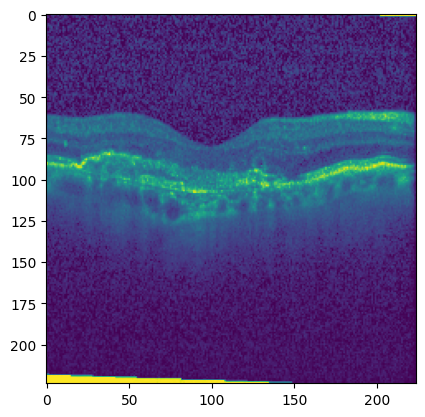

In [11]:
plt.imshow(sample)

In [12]:
X_train = np.array(x_train_list)/255.0
y_train = np.array(y_train_list)

X_test = np.array(x_test_list)/255.0
y_test = np.array(y_test_list)

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((12000, 224, 224), (12000,), (968, 224, 224), (968,))

In [13]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

In [18]:
model = models.Sequential()
model.add(layers.Conv2D(64, (3, 3), activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, IMG_CHNL)))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(256, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(512, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())
model.add(layers.Dense(4096, activation='relu'))
model.add(layers.Dense(1024,  activation='relu'))
model.add(layers.Dense(4, activation= 'softmax'))




In [19]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 222, 222, 64)      640       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 111, 111, 64)     0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 109, 109, 128)     73856     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 54, 54, 128)      0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 52, 52, 256)       295168    
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 26, 26, 256)     

In [20]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=10, 
                    validation_data=(X_test, y_test), verbose=2)

Epoch 1/10


KeyboardInterrupt: 